In [1]:
#necessary imports
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')


In [3]:
table = data[0]
table

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN


In [5]:
new_table = table[1:]
header = table.iloc[0]
ticker_table = table.rename(header)
ticker_table.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [6]:
tickers = ticker_table['Symbol'].tolist()
tickers = np.array(tickers)


In [7]:
#Downloading historical data for the tickers
start_date = '2017-01-01'
end_date = '2018-10-02'

#Using pandas datareader to import panel data
panel_data = web.DataReader(tickers[0:50], 'yahoo', start_date, end_date)
panel_data

Attributes   Adj Close                                                \
Symbols            MMM        ABT       ABBV        ABMD         ACN   
Date                                                                   
2017-01-03  163.944946  36.710361  54.121937  112.360001  110.738106   
2017-01-04  164.193558  37.001789  54.885078  115.739998  111.004356   
2017-01-05  163.631882  37.321415  55.301334  114.809998  109.340340   
2017-01-06  164.110687  38.336704  55.318676  115.419998  110.585968   
2017-01-09  163.226730  38.299114  55.682903  117.110001  109.349854   
...                ...        ...        ...         ...         ...   
2018-09-27  201.882660  71.232025  86.986252  442.890015  166.410629   
2018-09-28  202.459167  71.563698  87.392815  449.750000  166.557404   
2018-10-01  203.881210  72.305092  87.780907  444.250000  169.796555   
2018-10-02  207.263367  72.002670  87.069420  429.170013  169.444260   
2018-10-03  207.311401  70.276024  88.714157  426.420013  170.413086   

Attributes                                                           ...  \
Symbols          ATVI        ADBE        AMD         AAP        AES  ...   
Date                                                                 ...   
2017-01-03  35.941536  103.480003  11.430000  169.691284  10.267186  ...   
2017-01-04  36.647812  104.139999  11.430000  171.083817  10.179133  ...   
2017-01-05  37.216755  105.910004  11.240000  170.964462  10.047050  ...   
2017-01-06  37.187328  108.300003  11.320000  168.726456  10.408074  ...   
2017-01-09  36.981331  108.570000  11.490000  168.626968  10.152716  ...   
...               ...         ...        ...         ...        ...  ...   
2018-09-27  82.209618  269.910004  32.590000  169.465958  13.147846  ...   
2018-09-28  82.527061  269.950012  30.889999  168.008759  13.435756  ...   
2018-10-01  82.616341  275.489990  31.420000  169.276352  13.483741  ...   
2018-10-02  82.725464  272.000000  29.020000  168.078629  13.848426  ...   
2018-10-03  82.358414  270.510010  28.430000  167.280167  13.944394  ...   

Attributes     Volume                                                        \
Symbols           APH        ADI      ANSS       ANTM        AON        AOS   
Date                                                                          
2017-01-03   826300.0  2687200.0  345100.0  1525800.0   839000.0   887100.0   
2017-01-04   867100.0  1971000.0  426700.0  1250500.0   962400.0  1041600.0   
2017-01-05   842000.0  2067300.0  433800.0  1646000.0   792300.0  1447700.0   
2017-01-06   637700.0  2069700.0  528600.0  1105600.0   642000.0   978800.0   
2017-01-09   709000.0  2399500.0  370900.0   906700.0   727100.0   767100.0   
...               ...        ...       ...        ...        ...        ...   
2018-09-27   857300.0  1963500.0  443400.0   916900.0   849200.0  2202100.0   
2018-09-28  1256500.0  1650200.0  412300.0  1053800.0   960200.0  3237500.0   
2018-10-01   949700.0  1728800.0  326200.0  1015300.0   475800.0  2401600.0   
2018-10-02   857600.0  1737100.0  324800.0   922500.0   662300.0  2571800.0   
2018-10-03   906400.0  2915000.0  318800.0   707200.0  1441200.0  1297900.0   

Attributes                                                
Symbols           APA        AIV        AAPL        AMAT  
Date                                                      
2017-01-03  4816800.0   770100.0  28781900.0  13209400.0  
2017-01-04  2620100.0  1089400.0  21118100.0   9460600.0  
2017-01-05  2531900.0   833400.0  22193600.0   7290200.0  
2017-01-06  2936700.0  1299300.0  31751900.0   7063600.0  
2017-01-09  2334800.0   697700.0  33561900.0   9271800.0  
...               ...        ...         ...         ...  
2018-09-27  2257000.0   688700.0  30181200.0   7146400.0  
2018-09-28  3294500.0  1267800.0  22929400.0  11751200.0  
2018-10-01  2621500.0  1007200.0  23600800.0  10337000.0  
2018-10-02  1973700.0   712100.0  24788200.0   9626500.0  
2018-10-03  3140300.0  1059200.0  28654800.0   74417

In [9]:
adj_close = panel_data['Adj Close']
adj_close.head()

Symbols,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,APH,ADI,ANSS,ANTM,AON,AOS,APA,AIV,AAPL,AMAT
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,163.944946,36.710361,54.121937,112.360001,110.738106,35.941536,103.480003,11.43,169.691284,10.267186,...,65.546951,68.132599,93.349998,137.982056,108.320755,45.510860,58.898273,40.647781,110.953873,30.502211
2017-01-04,164.193558,37.001789,54.885078,115.739998,111.004356,36.647812,104.139999,11.43,171.083817,10.179133,...,66.032982,67.991646,94.440002,137.799042,109.509491,45.913265,58.722824,41.027672,110.829704,30.788708
2017-01-05,163.631882,37.321415,55.301334,114.809998,109.340340,37.216755,105.910004,11.24,170.964462,10.047050,...,65.683029,67.014435,94.709999,139.263229,109.673805,45.702484,58.408844,41.109070,111.393303,30.655003
2017-01-06,164.110687,38.336704,55.318676,115.419998,110.585968,37.187328,108.300003,11.32,168.726456,10.408074,...,66.178795,67.277534,93.949997,139.051300,110.514610,45.721649,58.288792,41.109070,112.635139,30.597706
2017-01-09,163.226730,38.299114,55.682903,117.110001,109.349854,36.981331,108.570000,11.49,168.626968,10.152716,...,65.498337,67.597015,94.290001,137.548569,109.596466,45.415054,57.586964,40.665863,113.666824,31.304390


In [10]:
googl = adj_close['GOOGL']
googl

Date
2017-01-03     808.010010
2017-01-04     807.770020
2017-01-05     813.020020
2017-01-06     825.210022
2017-01-09     827.179993
                 ...     
2018-09-27    1207.359985
2018-09-28    1207.079956
2018-10-01    1208.530029
2018-10-02    1207.640015
2018-10-03    1211.530029
Name: GOOGL, Length: 442, dtype: float64

In [11]:
rolling_googl_20 = googl.rolling(20).mean()
rolling_googl_50 = googl.rolling(50).mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


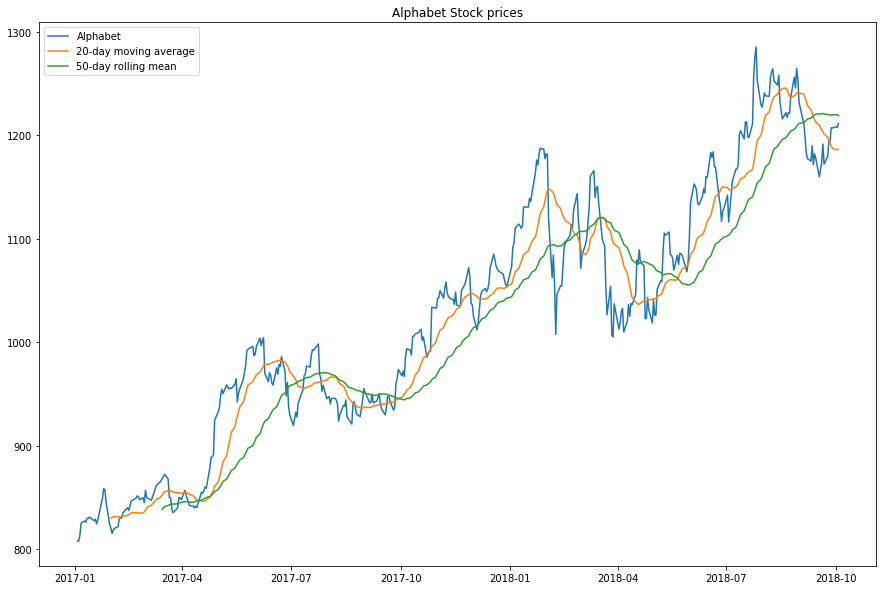

In [12]:
#Plotting
plt.figure(figsize=(15,10))
plt.plot(googl.index, googl, label = "Alphabet")
plt.plot(rolling_googl_20.index, rolling_googl_20, label = "20-day moving average")
plt.plot(rolling_googl_50.index, rolling_googl_50, label = "50-day rolling mean")
plt.title("Alphabet Stock prices")
#enabling a legend
plt.legend()
plt.show()

In [13]:
#Computing the log returns of all the tickers
#R(t) = log(P(t)) - log(P(t-1))
log_returns = np.log(adj_close) - np.log(adj_close.shift(1))
#The first row will display NaN values which can be ignored as there are no returns computed at that data point.

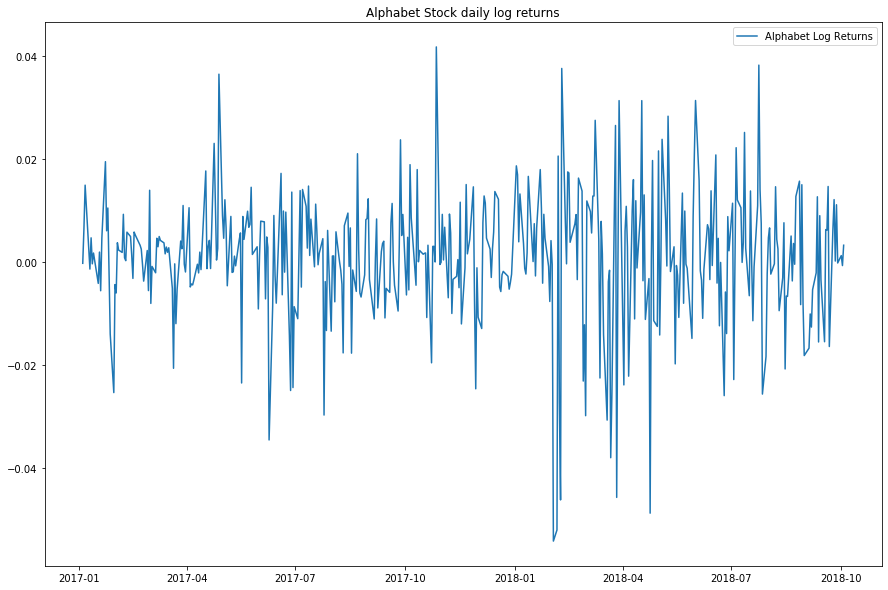

In [14]:
#Plotting the alphabet returns series 
googl_returns = log_returns['GOOGL']
#Plotting
plt.figure(figsize=(15,10))
plt.plot(googl_returns.index, googl_returns, label = "Alphabet Log Returns")
plt.title("Alphabet Stock daily log returns")
plt.legend()
plt.show()

In [15]:
#creating a trading signal
# A trading signal is basically a trigger which is used to take a trading action 
# i.e. taking a “long” or a “short” position in an asset. 
# We can generate a trading signal on each date (daily, weekly or whichever frequency one desires). 
# This signal can be interpreted as rebalancing a portfolio on each of those dates.

# For each day (or the end of any observation period), rank the stocks by previous day returns, from the highest to the lowest. 
# Select the top performing stocks for the long position in the portfolio, 
# and the bottom performing stocks for the short position in the portfolio.


In [16]:
#Getting the top 5 and bottom 5 performing stocks for each day
#Create an empty data frame with zeros
top = 5
bottom = 5
df_top = pd.DataFrame(0, index=log_returns.index, columns=log_returns.columns)
df_bottom = pd.DataFrame(0, index=log_returns.index, columns=log_returns.columns)

In [17]:
#Finding the indicator of top 5 performing stocks on a given day
for index, column in log_returns.iterrows():
    df_top.loc[index, log_returns.loc[index].nlargest(top).index] = 1
    
#Finding the indicator of bottom 5 performing stocks on a given day
for index, column in log_returns.iterrows():
    df_bottom.loc[index, log_returns.loc[index].nsmallest(bottom).index] = 1

In [18]:
#Computing portfolio returns
n_stocks = 10
portfolio_returns = (log_returns[df_top==1].fillna(0) - log_returns[df_bottom==1].fillna(0))/n_stocks

daily_portfolio_returns = portfolio_returns.T.sum()
daily_portfolio_returns

Date
2017-01-03    0.000000
2017-01-04    0.016760
2017-01-05    0.027574
2017-01-06    0.019498
2017-01-09    0.017923
                ...   
2018-09-27    0.016765
2018-09-28    0.019782
2018-10-01    0.019931
2018-10-02    0.030522
2018-10-03    0.019087
Length: 442, dtype: float64

In [28]:
#Computing other statistics for returns series
#Returns Mean
returns_mean = daily_portfolio_returns.mean()

#Returns Standard Deviation
returns_sd = daily_portfolio_returns.sem()

returns_mean, returns_sd

(0.021827994769983643, 0.00036583156496732526)

In [21]:
#Performing a one-tailed T-test to check if the actual mean from #generated signal is statistically greater than zero.
import scipy as sc
from scipy import stats

t, p = sc.stats.ttest_1samp(daily_portfolio_returns, 0)
print("T-statistic = {} , and associated p -value = {}".format(t, p/2))

T-statistic = 59.666788927667426 , and associated p -value = 1.3219544999810777e-213
